In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from scipy.constants import pi
import pdb

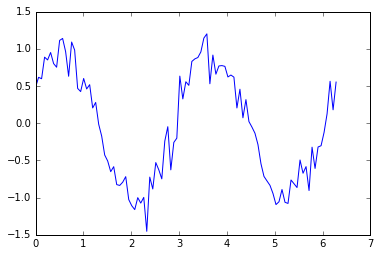

In [12]:
%matplotlib inline

####################################################################################################

def g(x, k, phi):                  #Signal
    return (np.sin(k*x + phi))

####################################################################################################

x = np.linspace(0, 2*pi, 101)
k = 2.     #Fitting parameter
phi = pi/6.     #Fitting Paramter
err_floor = 0.1
meas_err = np.cos(x)*0.2
var = err_floor**2 + meas_err**2
unc = sqrt(var)
y = g(x, k, phi) + np.random.randn(x.shape[0])*unc     #Signal with noise added with a 5:1 Signal-to-Noise ratio

# print(meas_err, err_floor, var, unc)

coeffs, cov = curve_fit(g, x, y, p0 = [k, phi])
k_best = coeffs[0]
phi_best = coeffs[1]

plt.figure()
plt.plot(x, y)
plt.show()

####################################################################################################



Best-fit polynomial coefficients: [0.641 -0.917 8.141 -13.880 9.099 -2.924 0.494 -0.042 0.001]

The covariance matrix:
[[0.019 -0.121 0.244 -0.231 0.119 -0.035 0.006 -0.001 0.000]
 [-0.121 1.132 -2.675 2.757 -1.493 0.457 -0.080 0.007 -0.000]
 [0.244 -2.675 6.819 -7.359 4.112 -1.288 0.228 -0.021 0.001]
 [-0.231 2.757 -7.359 8.188 -4.677 1.489 -0.267 0.025 -0.001]
 [0.119 -1.493 4.112 -4.677 2.717 -0.876 0.159 -0.015 0.001]
 [-0.035 0.457 -1.288 1.489 -0.876 0.286 -0.052 0.005 -0.000]
 [0.006 -0.080 0.228 -0.267 0.159 -0.052 0.010 -0.001 0.000]
 [-0.001 0.007 -0.021 0.025 -0.015 0.005 -0.001 0.000 -0.000]
 [0.000 -0.000 0.001 -0.001 0.001 -0.000 0.000 -0.000 0.000]]

chi2, chi2_nu, DOF are 108.967, 1.184, 92, respectively.

Best-fit c0 (coeff of the constant term) is: 0.641 +/- 0.139
Best-fit c1 (coeff of the linear term) is: -0.917 +/- 1.064

The c2 and c3 terms are the most negatively correlated (anti-correlated), with their covariance = -7.359
The c2 and c4 terms are the most positive

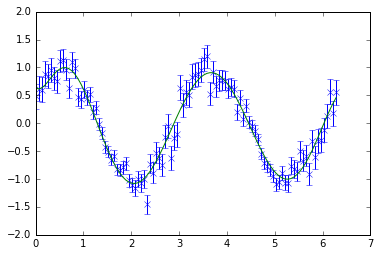

In [16]:
%matplotlib inline

def y_poly(x, c0, c1, c2, c3, c4, c5, c6, c7, c8):
    y_model = c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4 + c5*x**5 + c6*x**6 + c7*x**7 + c8*x**8
    return y_model

coeffs1, cov1 = curve_fit(y_poly, x, y)
best_fit = np.array([i for i in coeffs1])

DOF = len(y) - len(coeffs1)
chi2 = (((y - y_poly(x, *best_fit))/unc)**2).sum()
chi2_nu = chi2/DOF

unc_c0 = cov1[0,0]**.5
unc_c1 = cov1[1,1]**.5

triu_cov1 = np.triu(cov1, k=1)     #Only the upper triangle of the covariance matrix.  k=1 to avoid the diagonal.

triu_cov1_pos = np.where(triu_cov1 == triu_cov1.max())     #Most positive correlation between coefficients.
triu_cov1_neg = np.where(triu_cov1 == triu_cov1.min())     #Most negative correlation between coefficients.
# print(triu_cov1_pos[0][0], triu_cov1_pos[1][0])
# print(cov1[triu_cov1_pos][0])

triu_cov1_abs = abs(triu_cov1) + 1e6*abs(np.tril(cov1))     #Added large number to lower triangle and main diagonal in order to retrieve value closest to zero in the upper triangle.
triu_cov1_least = np.where(triu_cov1_abs == triu_cov1_abs.min())     #Least correlation between coefficients.

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})     #Formats print statement correctly using lambda function

print("Best-fit polynomial coefficients: {}".format(best_fit))

print("\nThe covariance matrix:\n{}".format(cov1))

print("\nchi2, chi2_nu, DOF are {:.3f}, {:.3f}, {:2d}, respectively.".format(chi2, chi2_nu, DOF))

print("\nBest-fit c0 (coeff of the constant term) is: {:.3f} +/- {:.3f}".format(coeffs1[0], unc_c0))
print("Best-fit c1 (coeff of the linear term) is: {:.3f} +/- {:.3f}".format(coeffs1[1], unc_c1))

print("\nThe c{:} and c{:} terms are the most negatively correlated (anti-correlated), with their covariance = {:.3f}".format(triu_cov1_neg[0][0], triu_cov1_neg[1][0], cov1[triu_cov1_neg][0]))
print("The c{:} and c{:} terms are the most positively correlated, with their covariance = {:.3f}".format(triu_cov1_pos[0][0], triu_cov1_pos[1][0], cov1[triu_cov1_pos][0]))
print("The c{:} and c{:} terms are the least correlated, with their covariance = {:.2e}".format(triu_cov1_least[0][0], triu_cov1_least[1][0], cov1[triu_cov1_least][0]))

plt.errorbar(x, y, yerr = unc, fmt = 'x')
plt.plot(x, y_poly(x, *coeffs1))
plt.ylim(-2, 2)
plt.show()